# Get data

## Peeringdb

In [14]:
import json
from pathlib import Path
import pandas as pd

filepath = Path('../../preprocessing/data/peeringdb/peeringdb_2_dump_2025_10_21.json')

with filepath.open('r', encoding='utf-8') as f:
    dump = json.load(f)

# extract the net.data section and load into a DataFrame
net_data = dump.get('net', {}).get('data')
if net_data is None:
    raise KeyError("JSON does not contain 'net' -> 'data' structure")

net_df = pd.DataFrame(net_data)
net_df['asn'] = net_df['asn'].astype(int)
net_df = net_df[net_df['info_type'] != '']

# show a quick preview
net_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,policy_ratio,policy_contracts,allow_ixp_update,status_dashboard,rir_status,rir_status_updated,logo,created,updated,status
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,True,Required,False,None,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2022-07-27T05:33:22Z,ok
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,False,Not Required,False,https://www.akamaistatus.com/,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-10-20T12:16:12Z,ok
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,False,Not Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-01-09T13:42:07Z,ok
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,True,Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-08-12T06:33:30Z,ok
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,False,Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2022-11-28T22:55:17Z,ok


## Paths

In [15]:
path_df = pd.read_csv('../../scripts/as_visibility.csv')
path_df.head()

,asn,seen_peers_path,visibility_path,seen_peers_origin,visibility_origin,centrality_mean,endprox_mean,nonterminal_rate,path_occurrences,origin_occurrences,total_unique_paths,total_peers
0,1,45,0.398230,45,0.398230,0.002632,0.001316,0.010526,95,45,7048176,113
1,2,84,0.743363,82,0.725664,0.184738,0.092369,0.300676,296,82,7048176,113
2,3,86,0.761062,87,0.769912,0.114676,0.057338,0.233918,342,87,7048176,113
3,4,90,0.796460,90,0.796460,0.003390,0.001695,0.008475,236,90,7048176,113
4,5,45,0.398230,43,0.380531,0.101111,0.050556,0.216667,60,43,7048176,113


## Merge data

In [16]:
merged_df = pd.merge(net_df, path_df, on='asn', how='left')
merged_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,visibility_path,seen_peers_origin,visibility_origin,centrality_mean,endprox_mean,nonterminal_rate,path_occurrences,origin_occurrences,total_unique_paths,total_peers
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,0.327434,0.0,0.000000,0.502703,0.251351,1.000000,37.0,0.0,7048176.0,113.0
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,0.823009,94.0,0.831858,0.310959,0.155480,0.639633,22552.0,94.0,7048176.0,113.0
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,0.345133,47.0,0.415929,0.000000,0.000000,0.000000,39.0,47.0,7048176.0,113.0
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,0.743363,85.0,0.752212,0.787618,0.393809,0.994200,24482.0,85.0,7048176.0,113.0
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,0.716814,81.0,0.716814,0.573653,0.286826,0.990237,15876.0,81.0,7048176.0,113.0


In [17]:
category_map = {
    "NSP": "Transit",
    "Content": "Content",
    "Cable/DSL/ISP": "Access",
    "Enterprise": "Enterprise",
    "Educational/Research": "Education/Research",
    "Non-Profit": "Enterprise",
    "Government": "Enterprise",
    "Route Server": "Network Services",
    "Route Collector": "Network Services",
    "Network Services": "Network Services",
    "Not-Disclosed": "Unknown"
}

merged_df["info_type"] = (
    merged_df["info_type"]
    .map(category_map)
    .fillna(merged_df["info_type"])
)
merged_df["info_type"].value_counts()

info_type
Access                11787
Transit                3982
Content                2486
Enterprise             2460
Network Services       1458
Education/Research     1457
Name: count, dtype: int64

In [18]:
merged_df["path_origin_ratio"] = merged_df["visibility_path"] / (merged_df["visibility_origin"] + 1e-6)
merged_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,seen_peers_origin,visibility_origin,centrality_mean,endprox_mean,nonterminal_rate,path_occurrences,origin_occurrences,total_unique_paths,total_peers,path_origin_ratio
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,0.0,0.000000,0.502703,0.251351,1.000000,37.0,0.0,7048176.0,113.0,327434.000000
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,94.0,0.831858,0.310959,0.155480,0.639633,22552.0,94.0,7048176.0,113.0,0.989361
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,47.0,0.415929,0.000000,0.000000,0.000000,39.0,47.0,7048176.0,113.0,0.829786
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,85.0,0.752212,0.787618,0.393809,0.994200,24482.0,85.0,7048176.0,113.0,0.988235
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,81.0,0.716814,0.573653,0.286826,0.990237,15876.0,81.0,7048176.0,113.0,0.999999


# Evaluate

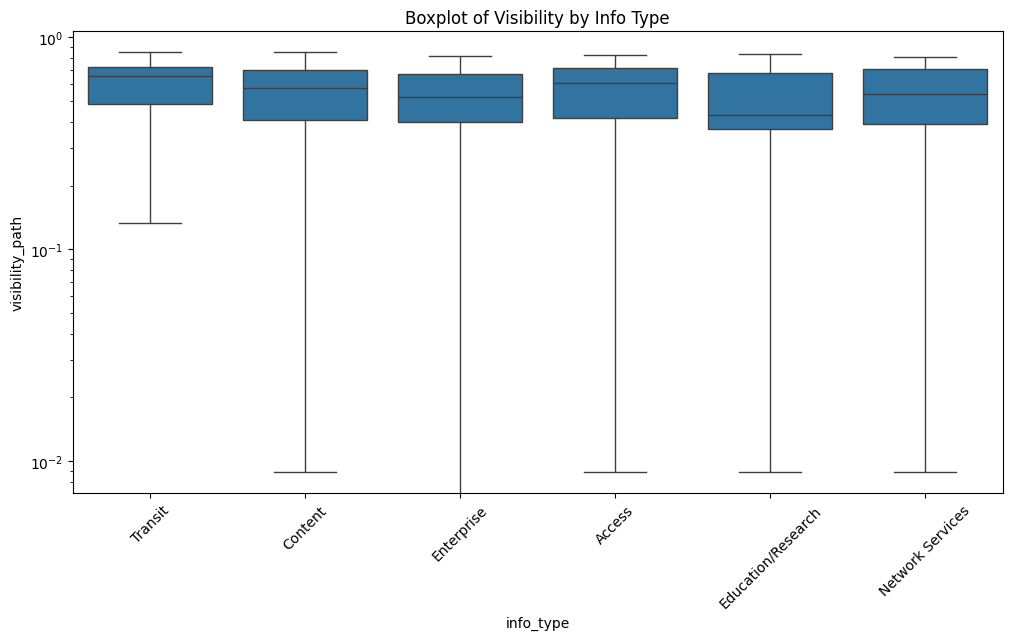

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='visibility_path', showfliers=False)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title('Boxplot of Visibility by Info Type')
plt.show()

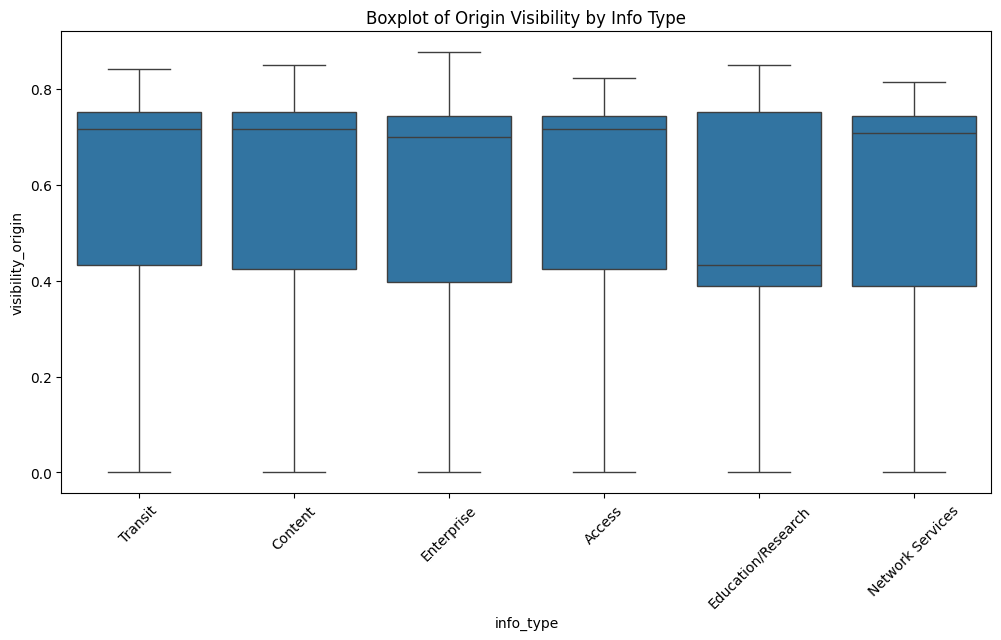

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='visibility_origin', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Origin Visibility by Info Type')
plt.show()

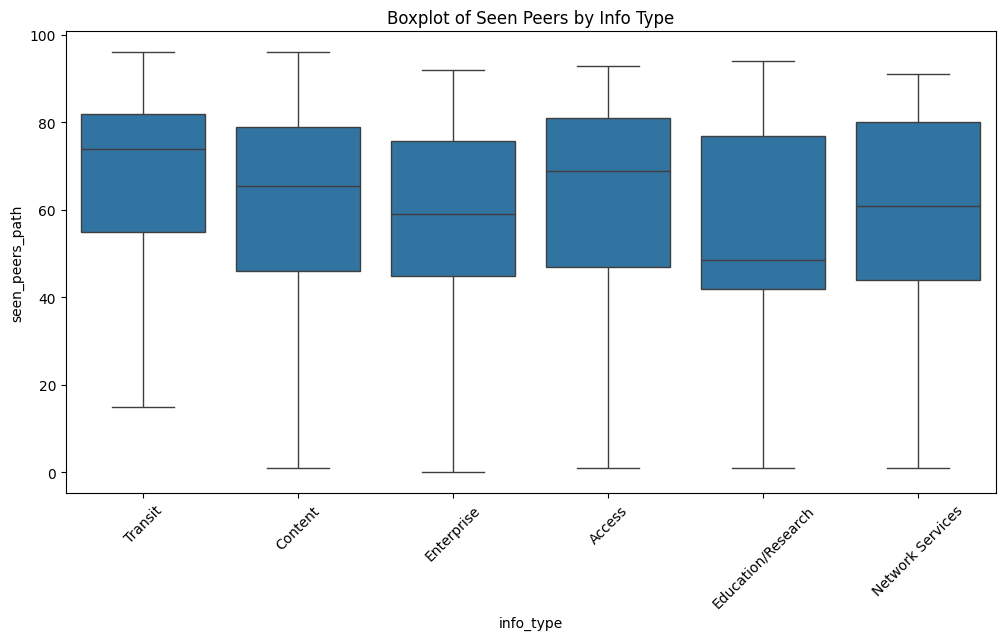

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='seen_peers_path', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Seen Peers by Info Type')
plt.show()

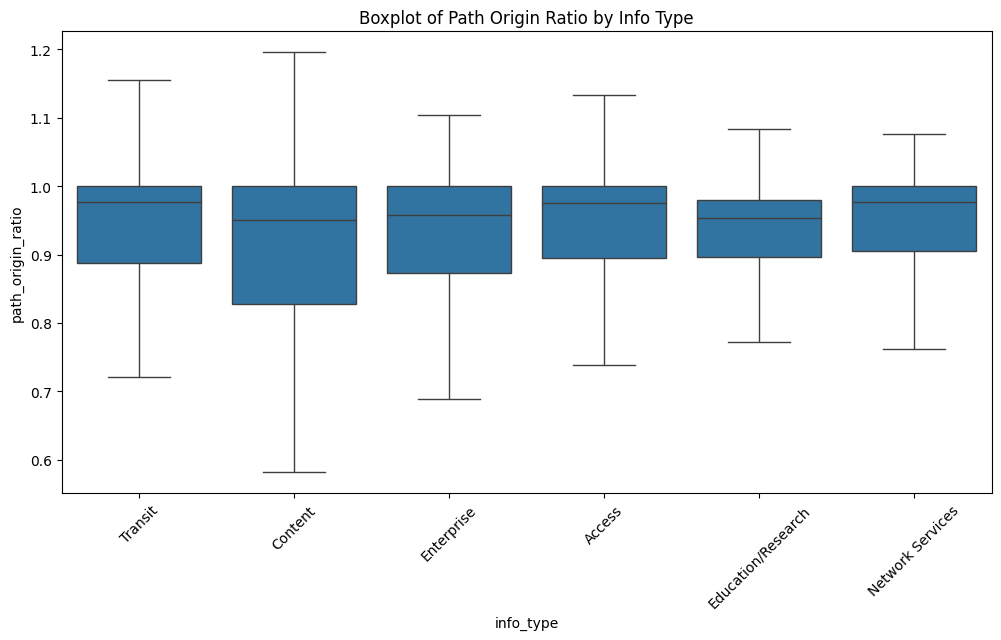

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='path_origin_ratio', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Path Origin Ratio by Info Type')
plt.show()

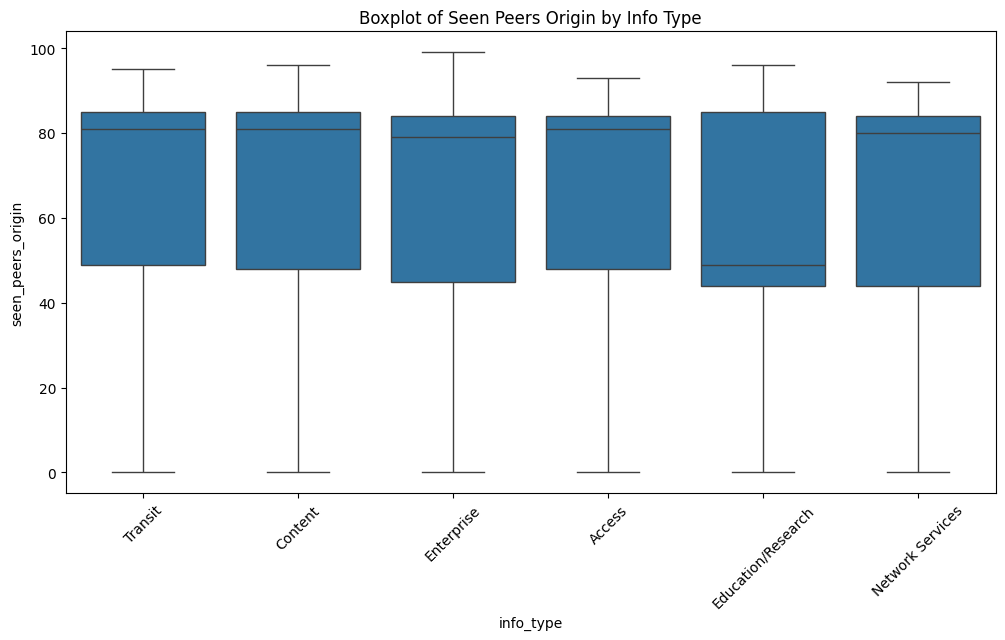

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='seen_peers_origin', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Seen Peers Origin by Info Type')
plt.show()

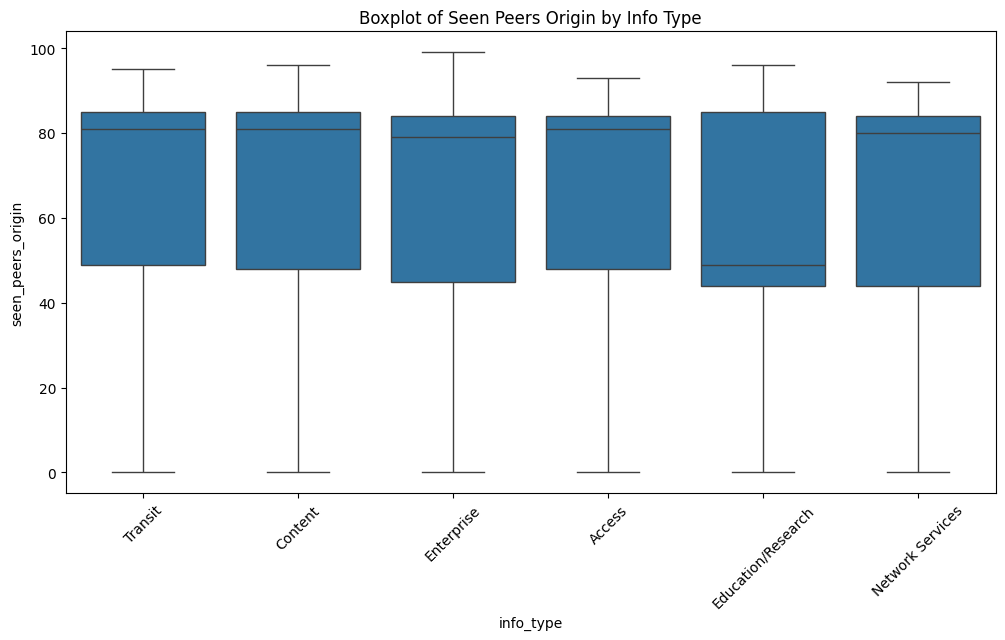

In [24]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='seen_peers_origin', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Seen Peers Origin by Info Type')
plt.show()

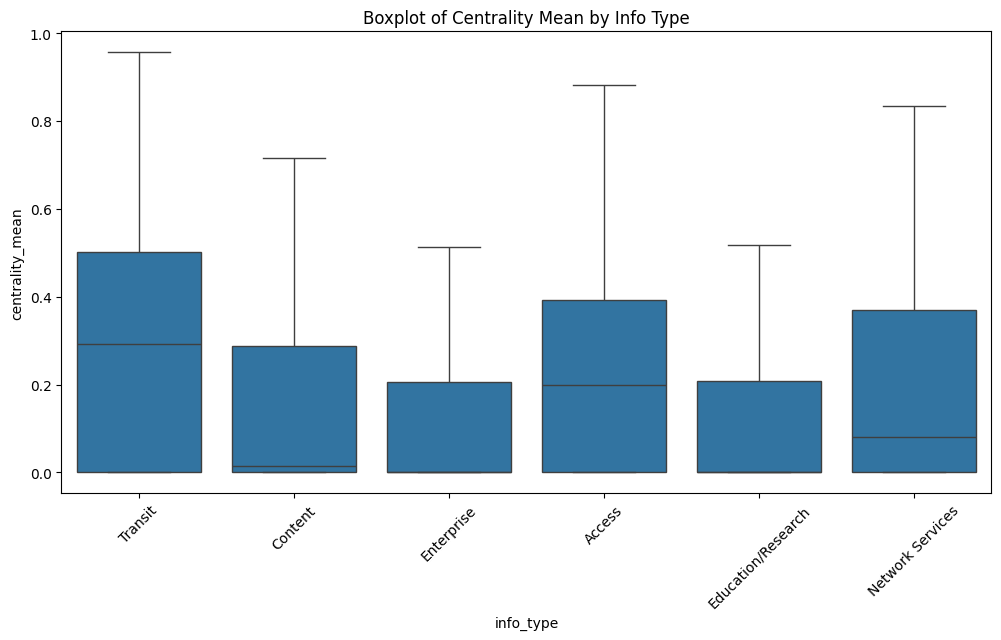

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='centrality_mean', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Centrality Mean by Info Type')
plt.show()

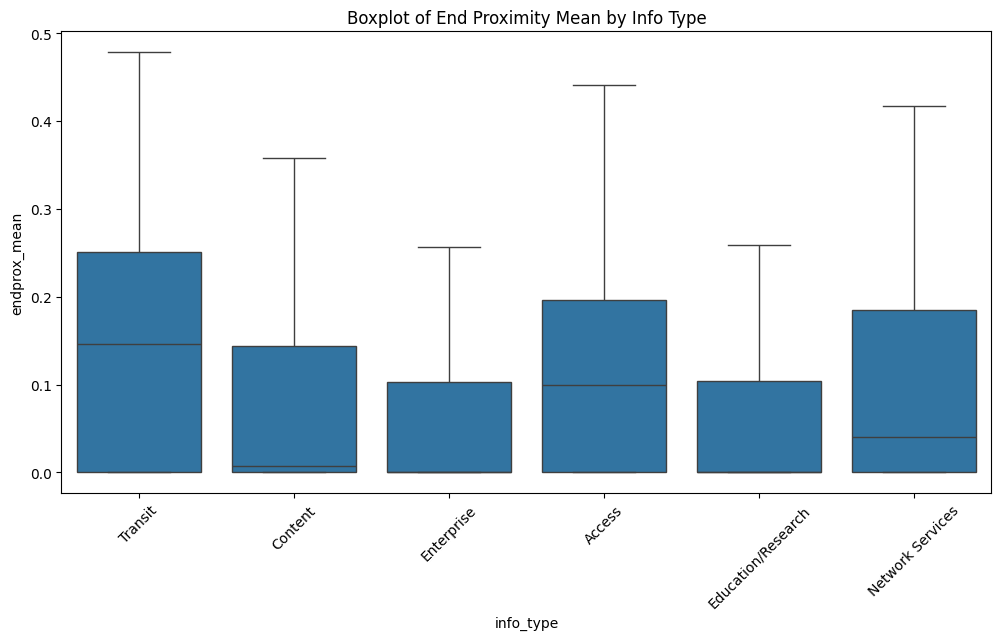

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='endprox_mean', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of End Proximity Mean by Info Type')
plt.show()

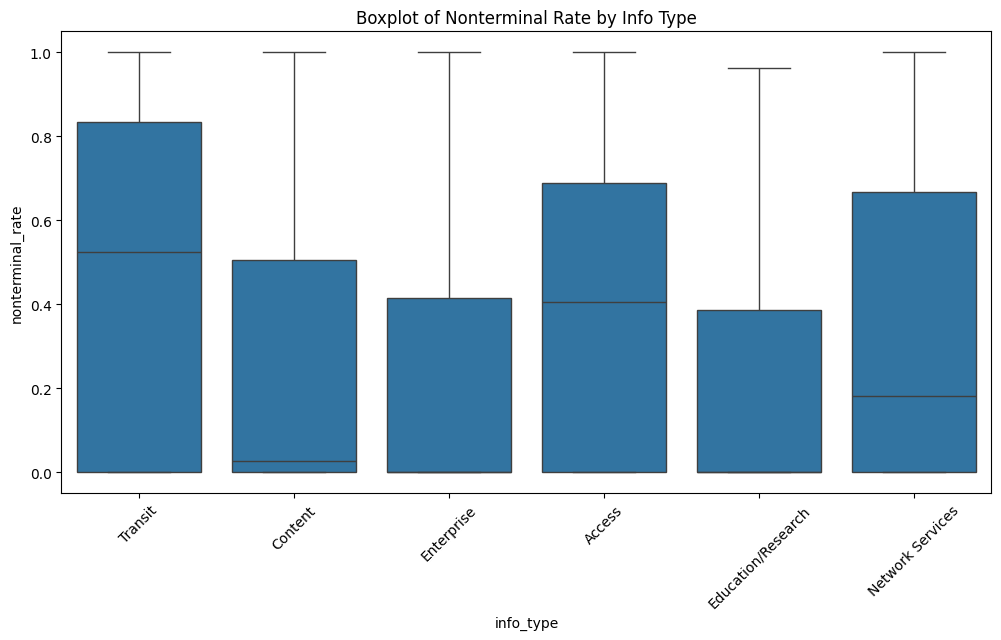

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='nonterminal_rate', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Nonterminal Rate by Info Type')
plt.show()

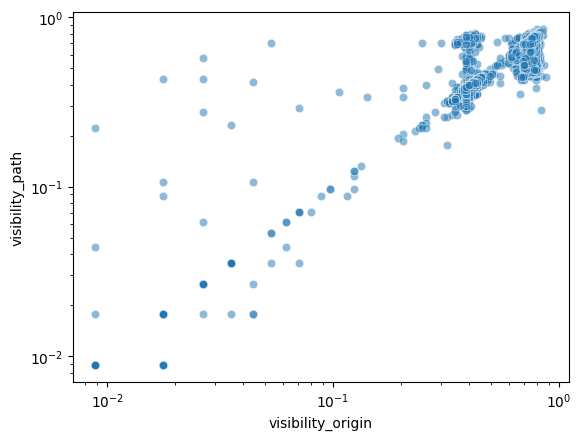

In [25]:
sns.scatterplot(
    data=merged_df,
    x="visibility_origin",
    y="visibility_path",
    alpha=0.5
)
plt.xscale("log"); plt.yscale("log")
